**116083**

# **Coursework 2**: Tecniques and Algorithms in Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_X_y

## **Part 1:** Multi-Layer Perceptron for Regression

**a)** Load the data into a pandas DataFrame, and get a scikit-lern compatible dataset. Use the "target" column as the target value.

In [2]:
# Import the dataset
part1 = pd.read_table('Part 1.tsv')

# I am going to use a smaller sample of the DataFrame to move on faster
part1 = part1.sample(2000)

# Split the columns used on X and the target used on y to train the model
X = part1[['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5']].to_numpy()
y = part1['target'].to_numpy()

**b)** Make a 70% / 30% split of the dataset for training and testing respectively.

In [3]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**c)** Using numpy, create a scikit-learn regressor that implements a multilayer perceptron
architecture with 5 hidden layers.
* The dimensionality of each layer is your decision.
* Each hidden layer must have a bias unit.
* All activations should be the sigmoid function.
* You must use the backpropagation algorithm to calculate the derivatives. 
* Use mini-batch gradient descent to update the weights.
* The parameters of the estimator are the following:
    - **learning_rate:** A float number that determines the learning rate used for updating the weights on the update step of the gradient descent.
    - **batch_size:** An integer that determines the number of datapoints that are included in each mini-batch.
    - **epochs**: An integer that determines the number of times the training goes through all the datapoints.

In [4]:
# Let us define some auxiliar functions to make the code more readable
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(output):
    return output * (1 - output)

In [5]:
# Implementation of the Multi Layer Perceptron (for Regression) class for 5 hidden layers
class MultiLayerPerceptronRegression():
    def __init__(self, learning_rate=0.0001, batch_size=100, epochs=100, size_hidden=100):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.size_hidden = size_hidden
        self.weights = []
        
    def create_weights(self, inputDim, outputDim):
        self.inputDim = inputDim
        self.outputDim = outputDim
        w = np.random.randn(inputDim, outputDim)
        return w
    
    # implements the forward propagation
    def forward(self, X):
        # instantiates two empty lists for z e h functions, 
        # which will receive the results of each iteration 
        # on the forward propagation 
        self.z = [X]
        self.activation = [self.z[-1]]
        
        for i in range(1,6):
            self.z.append(self.activation[i-1].dot(self.weights[i-1])) # z_i = activation_i-1 @ W_i-1
            SigmoidCalc = sigmoid(self.z[i])
            self.activation.append(SigmoidCalc) # activation_i = sigmoid(z_i)
            size = self.activation[i].shape[0]
            self.activation[i] = np.c_[np.ones((size, 1)), self.activation[i]] # adding the bias unit
        
        self.z.append(self.activation[-1] @ self.weights[-1]) # z_6 = activation_6_5 @ W_6
        self.activation.append(self.z[-1]) # activation_6 = z_6, and in this case (the output) we do not apply sigmoid
        return self.activation[-1]
        
    # implements the backward propagation    
    def backward(self, y_train):
        self.difference = [self.activation[6] - y_train] # difference_0^(5) = h_6 - y_train, first error
        self.dw = []
        
        for i in range(4, -1, -1):
            dotProduct = self.difference[-1] @ self.weights[i+1][1:, :].T # dotProduct = difference_i^(5) @ weights_i+1
            dotTodot = dotProduct * sigmoid_derivative(sigmoid(self.z[i+1])) # dotTodot = dotProduct * sigmoid'(z_i+1)
            self.difference.append(dotTodot)
        
        self.difference.reverse()

        self.dw = [self.activation[i].T.dot(self.difference[i]) for i in range(len(self.weights))]
        
        return self.dw
    
    # implements the update method
    def update(self, dw):
        self.weights = [w - (self.learning_rate * dw[i]) for i, w in enumerate(self.weights)]
        return self.weights
    
    # implements the fit method
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        n, m = X.shape
        
        _X = np.c_[np.ones((n, 1)), X]
        _y = y[:,np.newaxis]
        
        n, m = _X.shape
        
        self.weights.append(self.create_weights(m, self.size_hidden))
        
        for i in range(1,5):
            self.weights.append(self.create_weights(self.size_hidden + 1, self.size_hidden))
        
        self.weights.append(self.create_weights(self.size_hidden + 1, 1))
    
        n_batches = (n + self.batch_size - 1) // self.batch_size
        
        for epoch in range(self.epochs):
            for b in range(n_batches):
                _X_batch = _X[b * self.batch_size : (b + 1) * self.batch_size]
                _y_batch = _y[b * self.batch_size : (b + 1) * self.batch_size]
                self.activation[6] = self.forward(_X_batch)
                dw = self.backward(_y_batch)
                self.update(dw)
                
    # implements the predict method    
    def predict(self, X):
        n, m = X.shape
        X = np.c_[np.ones((n, 1)), X]
        return self.forward(X)

**d)** Train the estimator you implemented using the training set. Use the trained estimator to predict values for the test set.

In [6]:
RegressionPercep = MultiLayerPerceptronRegression()
RegressionPercep.fit(X_train, y_train)
ypredMine = RegressionPercep.predict(X_test)

**e)** Use the scikit-learn MLPRegressor estimator. Train it on the training set and generate predictions for the test set.

In [7]:
from sklearn.neural_network import MLPRegressor

sklPerceptron = MLPRegressor(max_iter=100, batch_size = 100, learning_rate_init=0.0001, 
                             solver='sgd', activation='logistic')

sklPerceptron.fit(X_train, y_train)
ypredScikit = sklPerceptron.predict(X_test)

/home/felipelmc/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


**f)** Compare the performance of both models using the mean squared error metric from scikit-learn.

In [8]:
from sklearn.metrics import mean_squared_error

mseMyModel = (mean_squared_error(ypredMine, y_test)**(1/2)).round(2)
mseScikit = (mean_squared_error(ypredScikit, y_test)**(1/2)).round(2)

print(f'sqrt(MSE) for my model: {mseMyModel}. \nsqrt(MSE) for the Scikit-learn model: {mseScikit}.')

sqrt(MSE) for my model: 5.2. 
sqrt(MSE) for the Scikit-learn model: 21.41.


## **Part 2:** Multi Layer Perceptron for Classification

**a)** Load the data into a pandas DataFrame, and get a scikit-learn compatible dataset. Use the “target” column as the target variable.

In [9]:
part2 = pd.read_table('Part 2.tsv')

# I am going to use a smaller sample of the DataFrame to move on faster
part2 = part2.sample(2000)

# Split the columns used on X and the target used on y to train the model
X = part2[['feat_0', 'feat_1', 'feat_2', 'feat_3']].to_numpy()
y = part2['target'].to_numpy()

**b)** Make a 70% / 30% split of the dataset for training and testing respectively.

In [10]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**c)** Using numpy, create a scikit-learn classifier that implements a multilayer perceptron with the following parameters:
* Each hidden layer must have a bias unit.
* All activations should be the sigmoid function.
* You must use the backpropagation algorithm to calculate the derivatives. 
* Use mini-batch gradient descent to update the weights.
* The parameters of the estimator are the following:

    - **hidden_layers_dimensions:** A list of integers that determines the number and dimensionality of the hidden layers. The number of items on the list determine the number of hidden layers. The first element of the list (at index 0) is the dimensionality of the first hidden layer (connected to the input). The last element is the dimensionality of the hidden layer (connected to the output layer). The dimensionality does not include the bias term. The dimensionality of the input and output layers should be inferred from the dimensionality of the data. **For example:** A list [4,3,2] will generate 3 hidden layers with dimensions 4, 3, and 2, respectively. If we count the bias units, the dimensions are 5, 4, 3.

    - **learning_rate:** A float number that determines the learning rate used for updating the weights in gradient descent.
    - **batch_size:** An integer that determines the number of datapoints that are included in each mini-batch.
    - **epochs:** An integer that determines the number of times the training goes through all the datapoints.

In [11]:
# Here we are going to need another auxiliar function
def cost_function(y, y_hat):
    return -np.sum(y*(np.log(y_hat)) + (1 - y)*np.log(1 - y_hat)) / y.shape[0]

In [12]:
# Implementation of the Multi Layer Perceptron (for Classification) class for 5 hidden layers
class MultiLayerPerceptronClassification():
    def __init__(self, learning_rate=0.0001, batch_size=32, epochs=100, 
                 hidden_layers_dimensions=[4, 4, 4, 4]):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.hidden_layers_dimensions = hidden_layers_dimensions
        self.weights = []
        self.training_losses = np.zeros(self.epochs)
        
    def create_weights(self, inputDim, outputDim):
        self.inputDim = inputDim
        self.outputDim = outputDim
        w = np.random.randn(inputDim, outputDim)
        return w
    
    # implements the forward propagation
    def forward(self, X):
        # instantiates two empty lists for z e h functions, 
        # which will receive the results of each iteration 
        # on the forward propagation 
        self.z = [X]
        self.activation = [self.z[-1]]
        
        for i in range(1, len(self.hidden_layers_dimensions) + 1):
            self.z.append(self.activation[i-1] @ self.weights[i-1]) # z_i = activation_i-1 @ W_i-1
            SigmoidCalc = sigmoid(self.z[i])
            self.activation.append(SigmoidCalc) # activation_i = sigmoid(z_i)
            size = self.activation[i].shape[0]
            self.activation[i] = np.c_[np.ones((size, 1)), self.activation[i]] # adding the bias unit
        
        self.z.append(self.activation[-1] @ self.weights[-1]) # z_-1 = activation_-1 @ W_-1
        self.activation.append(self.z[-1]) # activation_i-1 = z_-1, and in this case (the output) we do not apply sigmoid
        return self.activation[-1]
        
    # implements the backward propagation    
    def backward(self, y_train):
        self.difference = [self.activation[len(self.hidden_layers_dimensions)] - y_train] # difference_0^(5) = h_6 - y_train, first error
        self.dw = []
        
        for i in range(len(self.hidden_layers_dimensions)-1, -1, -1):
            dotProduct = self.difference[-1] @ self.weights[i+1][1:, :].T # dotProduct = difference_i^(5) @ weights_i+1
            dotTodot = dotProduct * sigmoid_derivative(sigmoid(self.z[i+1])) # dotTodot = dotProduct * sigmoid'(z_i+1)
            self.difference.append(dotTodot)
        
        self.difference.reverse()

        self.dw = [self.activation[i].T.dot(self.difference[i]) for i in range(len(self.weights))]
        
        return self.dw
    
    # implements the update method
    def update(self, dw):
        self.weights = [w - (self.learning_rate * dw[i]) for i, w in enumerate(self.weights)]
        return self.weights
    
    # implements the fit method
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        m = X.shape[1]
        n = X.shape[0]
        
        _X = np.c_[np.ones((n, 1)), X]
        _y = y[:,np.newaxis]
        
        m = _X.shape[1]
        n = _X.shape[0]
        
        self.weights.append(self.create_weights(m, self.hidden_layers_dimensions[0]))
        
        for i in range (len(self.hidden_layers_dimensions)-1):
            self.weights.append(self.create_weights(self.hidden_layers_dimensions[i]+ 1, self.hidden_layers_dimensions[i+1]))
        
        self.weights.append(self.create_weights(self.hidden_layers_dimensions[-1]+1, 1))
    
        n_batches = (n + self.batch_size - 1) // self.batch_size
        
        for epoch in range(self.epochs):
            for b in range(n_batches):
                _X_batch = _X[b * self.batch_size : (b + 1) * self.batch_size]
                _y_batch = _y[b * self.batch_size : (b + 1) * self.batch_size]
                self.activation[len(self.hidden_layers_dimensions)] = self.forward(_X_batch)
                dw = self.backward(_y_batch)
                self.update(dw)
                self.training_losses[epoch] = cost_function(_y_batch, self.activation[len(self.hidden_layers_dimensions)])
                
    # implements the predict method    
    def predict(self, X):
        n, m = X.shape
        X = np.c_[np.ones((n, 1)), X]
        return self.forward(X)
    
    def predict_proba(self, X):
        n, m = X.shape
        _X = np.c_[np.ones((n, 1)), X]
        
        pred_1 = self.forward(_X)
        return pred_1

**d)** Train the estimator you implemented using the training set. Use the trained estimator to predict values for the test set.
* During training, use the following parameters: 

    - hidden_layers_dimensions = [4,4,4,4] 
    - learning_rate = 0.0001
    - batch_size = 32
    - epochs = 100

In [34]:
ClassificationPercep = MultiLayerPerceptronClassification()
ClassificationPercep.fit(X_train, y_train)
ypredMine = ClassificationPercep.predict(X_test) > 0.5

**e)** Evaluate the trained model on the test set using the following metrics:
* Accuracy 
* AUC-PR 
* AUC-ROC

In [35]:
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score

proba_pred = ClassificationPercep.predict_proba(X_test)

accuracy = accuracy_score(ypredMine, y_test).round(3)*100
AUC_PR = average_precision_score(y_test, proba_pred).round(3)*100
AUC_ROC = roc_auc_score(y_test, proba_pred).round(3)*100

print(f'Accuracy: {accuracy}% \nAUC-PR: {AUC_PR}% \nAUC-ROC: {AUC_ROC}%')

Accuracy: 61.3% 
AUC-PR: 78.7% 
AUC-ROC: 74.2%


**f)** During each epoch of training, collect the loss, and make a plot with the epoch number in the X axis, and the loss on the Y axis.

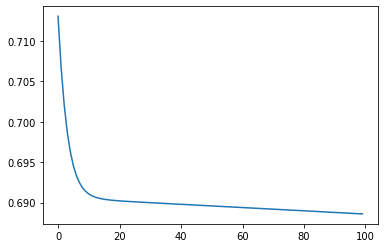

In [36]:
plt.plot(ClassificationPercep.training_losses)
plt.show()

**g)** Print the confusion matrix related to the test set.

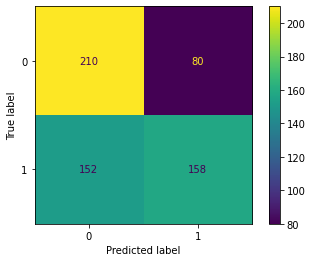

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrix = confusion_matrix(y_test, ypredMine)
disp = ConfusionMatrixDisplay(ConfusionMatrix)
disp.plot()

## **Part 3**: Random forest for Classification

Download the Census Income dataset (https://archive.ics.uci.edu/ml/datasets/Adult). In this part, you will implement random forests. Be aware that some of the variables in this dataset are nominal (or categorical).

Here are the steps that you will need to do:

**a)** Load the data into a pandas DataFrame, and get a scikit-learn compatible dataset.

In [17]:
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
            'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native_country', 'salary']

part3 = pd.read_csv('Part 3.data', names = colnames, header = None)

# I am going to use a smaller sample of the DataFrame to move on faster
part3 = part3.sample(2000)

# Split the columns used on X and the target used on y to train the model
X = part3.loc[:, part3.columns != 'salary'].to_numpy()
y = part3['salary'].to_numpy().reshape(-1, 1)

**b)** Make a 70% / 30% split of the dataset for training and testing respectively.

In [18]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**c)** An implementation of the Random Forest algorithm, as described in Section 8.2.2 of the Witten, James, Hastie & Tibshirani book. You should add the following options:
- A parameter **num_features** for the number of predictors to consider at each split
- A parameter **num_trees** to control the number of trees in the forest
- Parameters for controlling the growth of trees, you need to implement **at least** two of the following:
    - Maximum level of the tree
    - Minimum number of observations in a node
    - Stopping criterion based on the proportion of classes in the node

In [19]:
# here we write a model to decide the optimal splits and predict the salary of the people on the dataset
# the splits must maximize info gain using entropy, which is given by the summation of (-p(x_i)*log(p(x_i))
# we need to substract the combined entropy of the child nodes from the entropy of the parent node (this is the info gain)
# we will need to do bootstrapping and feature selection

# as it is a tree, we need nodes
class Node():
    def __init__(self, feature_index=None, limit=None, left=None, right=None, ig=None, value=None):
        self.feature_index = feature_index
        self.limit = limit
        self.left = left
        self.right = right
        self.ig = ig
        self.value = value


class DecisionTree():
    def __init__(self, max_level=3, min_n_observations=3):
        self.root = None,
        self.max_level = max_level
        self.min_n_observations = min_n_observations
    
    def newTree(self, df, curr_depth = 0):
        X = df[:, :-1]
        y = df[:, -1]
        samples, features = X.shape
        
        if samples >= self.min_n_observations and curr_depth <= self.max_level:
            maxSplit = self.maximizedSplit(df, features)
            
            if 'ig' not in maxSplit:
                maxSplit['ig'] = -10000
            
            if maxSplit['ig'] > 0:
                left_subtree = self.newTree(maxSplit['left_df'], curr_depth+1)
                right_subtree = self.newTree(maxSplit['right_df'], curr_depth+1)
                return Node(maxSplit['feature_index'], maxSplit['limit'], 
                            left_subtree, right_subtree, maxSplit['ig'])

        return Node(value = max(list(y), key=list(y).count))

    def maximizedSplit(self, df, features):
        maxSplit = {}
        max_ig = -10000
        
        for feature_index in range(features):
            feature_values = df[:, feature_index]
            unique_values = np.unique(feature_values)
            
            for limit in unique_values:
                left_df, right_df = self.split(df, feature_index, limit)
                
                if left_df.shape[0] > 0 and right_df.shape[0] > 0:
                    y = df[:, -1]
                    left_y = left_df[:, -1]
                    right_y = right_df[:, -1]
                    curr_ig = self.ig(y, left_y, right_y)
                    
                    if curr_ig > max_ig:
                        max_ig = curr_ig
                        maxSplit = {'feature_index': feature_index, 'limit': limit, 
                                      'left_df': left_df, 'right_df': right_df, 
                                      'ig': curr_ig}
                        
        return maxSplit
    
    def split(self, df, feature_index, limit):
        left_df = np.array([row for row in df if row[feature_index] <= limit])
        right_df = np.array([row for row in df if row[feature_index] > limit])
        return left_df, right_df
    
    def ig(self, parent, left_child, right_child):
        wleft = len(left_child) / len(parent)
        wright = len(right_child) / len(parent)
        
        EntropyParent = self.entropy(parent)
        EntropyLeft = self.entropy(left_child)
        EntropyRight = self.entropy(right_child)
        
        return EntropyParent - (wleft*EntropyLeft + wright*EntropyRight)
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls*np.log2(p_cls)
        return entropy
    
    def fit(self, X, y):
        df = np.c_[X, y]
        self.root = self.newTree(df)
        
    def predict(self, X):
        preds = [self.make_prediction(x, self.root) for x in X]
        return preds
        
    def make_prediction(self, x, tree):
        if tree.value != None:
            return tree.value
        
        feature_value = x[tree.feature_index]
        if feature_value <= tree.limit:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

class RandomForest():
    def __init__(self, num_trees=10, num_features=3, max_level=3, min_n_observations=3):
        self.num_trees = num_trees
        self.num_features = num_features
        self.max_level = max_level
        self.min_n_observations = min_n_observations
        self.trees = []
        self.maxLabel = []
    
    def labelMode(self, y):
        return dict(zip(*np.unique(y, return_counts=True)))
    
    def boostrap(self, X, y):
        df = np.c_[X, y]
        samples = df.shape[0]
        
        rows = np.random.randint(len(df), size=samples)
        X_sample = X[rows, :]
        y_sample = y[rows]
        return X_sample, y_sample
    
    def aggregate(self, X_sample, num_features):
        m = X_sample.shape[1]
        ideal = np.sqrt(num_features).round().astype(int)
        columns = np.random.choice(m, size=(m-ideal), replace=False)
        X[:,columns] = 0
        return X_sample
        
    def fit(self, X, y):
        for i in range(self.num_trees):
            X_sample, y_sample = self.boostrap(X, y)
            X_sample = self.aggregate(X_sample, self.num_features)
            tree = DecisionTree(self.max_level, self.min_n_observations)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        preds = np.swapaxes(preds, 0, 1)
        
        labels = []
        for pred in preds:
            labels.append(self.labelMode(pred))
        labels = np.array(labels)
        
        for label in labels:
            maximize = max(label, key = label.get)
            self.maxLabel.append(maximize)
        return np.array(self.maxLabel).reshape(-1,1) 

    def predict_proba(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        preds = np.swapaxes(preds, 0, 1)
        return preds

In [20]:
RandForest = RandomForest()
RandForest.fit(X_train, y_train)
prediction = RandForest.predict(X_test)

# checking the accuracy
accuracy = accuracy_score(prediction, y_test).round(3) * 100
print(f'{accuracy}%')

85.0%


## **Part 4** – Performance comparison

This part relies on the models you implemented in Parts 2 and 3. You should use the dataset from Part 2.

Here are the steps that you will need to do:

**a)** Use your classifiers (multi-layer perceptron classifier and random forest).

- Train them on the training set.

- Make predictions on the test set

In [21]:
part2 = pd.read_table('Part 2.tsv')

# I am going to use a smaller sample of the DataFrame to move on faster
part2 = part2.sample(2000)

# Split the columns used on X and the target used on y to train the model
X = part2[['feat_0', 'feat_1', 'feat_2', 'feat_3']].to_numpy()
y = part2['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
ClassificPercep = MultiLayerPerceptronClassification()
ClassificPercep.fit(X_train, y_train)
predictionMultiLayerPerceptron = ClassificPercep.predict(X_test) > 0.5

In [23]:
RandForest = RandomForest()
RandForest.fit(X_train, y_train)
predictionRandomForest = RandForest.predict(X_test)

**b)** Choose any 3 classifiers from scikit-learn and repeat steps in a) for each classifier. You can find a list of classifiers on the scikit-learn documentation.

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
predictionQDA = QDA.predict(X_test)

/home/felipelmc/.local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [25]:
from sklearn.svm import SVC
SVC = SVC(probability=True)
SVC.fit(X_train, y_train)
predictionSVC = SVC.predict(X_test)

In [26]:
from sklearn.gaussian_process import GaussianProcessClassifier
GPC = GaussianProcessClassifier()
GPC.fit(X_train, y_train)
predictionGPC = GPC.predict(X_test)

**c)** You will have obtained 5 sets of predictions from all the models you trained. Use these predictions and the labels from the test set to calculate the performance of each model using the following performance metrics:
- Precision
- Recall
- AUC-ROC
- AUC-PR

In [31]:
from sklearn.metrics import recall_score, precision_score

# Perceptron
probaPerceptron = ClassificationPercep.predict_proba(X_test)
Precision_Perceptron = precision_score(predictionMultiLayerPerceptron, y_test).round(3)*100
Recall_Perceptron = recall_score(predictionMultiLayerPerceptron, y_test).round(3)*100
AUC_PR_Perceptron = average_precision_score(y_test, proba_pred).round(3)*100
AUC_ROC_Perceptron = roc_auc_score(y_test, proba_pred).round(3)*100
print(f'1) Multi-Layer Perceptron for Classification: \nPrecision: {Precision_Perceptron}%\nRecall: {Recall_Perceptron}%\nAUC_PR: {AUC_PR_Perceptron}%\nAUC_ROC: {AUC_ROC_Perceptron}%\n')

# RandomForest
probaRandomForest = RandForest.predict_proba(X_test)[:, 1]
Precision_RandomForest = precision_score(predictionRandomForest, y_test).round(3)*100
Recall_RandomForest = recall_score(predictionRandomForest, y_test).round(3)*100
AUC_PR_RandomForest = average_precision_score(y_test, probaRandomForest).round(3)*100
AUC_ROC_RandomForest = roc_auc_score(y_test, probaRandomForest).round(3)*100
print(f'2) Random Forest: \nPrecision: {Precision_RandomForest}%\nRecall: {Recall_RandomForest}%\nAUC_PR_RandomForest: {AUC_PR_RandomForest}%\nAUC_ROC_RandomForest: {AUC_ROC_RandomForest}%\n')

# QuadraticDiscriminantAnalysis
probaQuadraticDiscriminantAnalysis = QDA.predict_proba(X_test)[:, 1]
Precision_QDA = precision_score(predictionQDA, y_test).round(3)*100
Recall_QDA = recall_score(predictionQDA, y_test).round(3)*100
AUC_PR_QDA = average_precision_score(y_test, probaQuadraticDiscriminantAnalysis).round(3)*100
AUC_ROC_QDA = roc_auc_score(y_test, probaQuadraticDiscriminantAnalysis).round(3)*100
print(f'3) Quadratic Discriminant Analysis: \nPrecision: {Precision_QDA}%\nRecall: {Recall_QDA}%\nAUC_PR: {AUC_PR_QDA}%\nAUC_ROC: {AUC_ROC_QDA}%\n')

# SVC
probaSVC = SVC.predict_proba(X_test)[:, 1]
Precision_SVC = precision_score(predictionSVC, y_test).round(3)*100
Recall_SVC = recall_score(predictionSVC, y_test).round(3)*100
AUC_PR_SVC = average_precision_score(y_test, probaSVC).round(3)*100
AUC_ROC_SVC = roc_auc_score(y_test, probaSVC).round(3)*100
print(f'4) SVC: \nPrecision: {Precision_SVC}%\nRecall: {Recall_SVC}%\nAUC-PR: {AUC_PR_SVC}%\nAUC-ROC: {AUC_ROC_SVC}%\n')

# GaussianProcessClassifier
probaGPC = GPC.predict_proba(X_test)[:, 1]
Precision_GPC = precision_score(predictionGPC, y_test).round(3)*100
Recall_GPC = recall_score(predictionGPC, y_test).round(3)*100
AUC_PR_GPC = average_precision_score(y_test, probaGPC).round(3)*100
AUC_ROC_GPC = roc_auc_score(y_test, probaGPC).round(3)*100
print(f'5) Gaussian Process Classifier: \nPrecision: {Precision_GPC}%\nRecall: {Recall_GPC}%\nAUC-PR: {AUC_PR_GPC}%\nAUC-ROC: {AUC_ROC_GPC}%')

1) Multi-Layer Perceptron for Classification: 
Precision: 80.30000000000001%
Recall: 61.9%
AUC_PR: 54.1%
AUC_ROC: 51.300000000000004%

2) Random Forest: 
Precision: 82.6%
Recall: 91.8%
AUC_PR_RandomForest: 84.6%
AUC_ROC_RandomForest: 87.2%

3) Quadratic Discriminant Analysis: 
Precision: 50.3%
Recall: 76.5%
AUC_PR: 73.5%
AUC_ROC: 79.2%

4) SVC: 
Precision: 85.8%
Recall: 90.5%
AUC-PR: 94.19999999999999%
AUC-ROC: 95.5%

5) Gaussian Process Classifier: 
Precision: 92.60000000000001%
Recall: 88.9%
AUC-PR: 95.19999999999999%
AUC-ROC: 96.5%


**d)** Create a comparison report. Your code will:

- Print a table with values of the performance metric (columns) for each model (rows) on the test set.

In [32]:
data = [{'Model': 'Multi-Layer Perceptron (Classification)', 'Precision': Precision_Perceptron, 'Recall': Recall_Perceptron, 'AUC-PR': AUC_PR_Perceptron, 'AUC-ROC': AUC_ROC_Perceptron},
        {'Model': 'Random Forest', 'Precision': Precision_RandomForest, 'Recall': Recall_RandomForest, 'AUC-PR': AUC_PR_RandomForest, 'AUC-ROC': AUC_ROC_RandomForest},
        {'Model': 'Quadratic Discriminant Analysis', 'Precision': Precision_QDA, 'Recall': Recall_QDA, 'AUC-PR': AUC_PR_QDA, 'AUC-ROC': AUC_ROC_QDA},
        {'Model': 'SVC', 'Precision': Precision_SVC, 'Recall': Recall_SVC, 'AUC-PR': AUC_PR_SVC, 'AUC-ROC': AUC_ROC_SVC},
        {'Model': 'Gaussian Process Classifier', 'Precision': Precision_GPC, 'Recall': Recall_GPC, 'AUC-PR': AUC_PR_GPC, 'AUC-ROC': AUC_ROC_GPC}]

performance = pd.DataFrame(data)
performance

,Model,Precision,Recall,AUC-PR,AUC-ROC
0,Multi-Layer Perceptron (Classification),80.3,61.9,54.1,51.3
1,Random Forest,82.6,91.8,84.6,87.2
2,Quadratic Discriminant Analysis,50.3,76.5,73.5,79.2
3,SVC,85.8,90.5,94.2,95.5
4,Gaussian Process Classifier,92.6,88.9,95.2,96.5


- Make a single figure containing 2 subplots. In the first subplot, you will plot the ROC curves for each model. In the second subplot, you will plot the PR curves for each model.

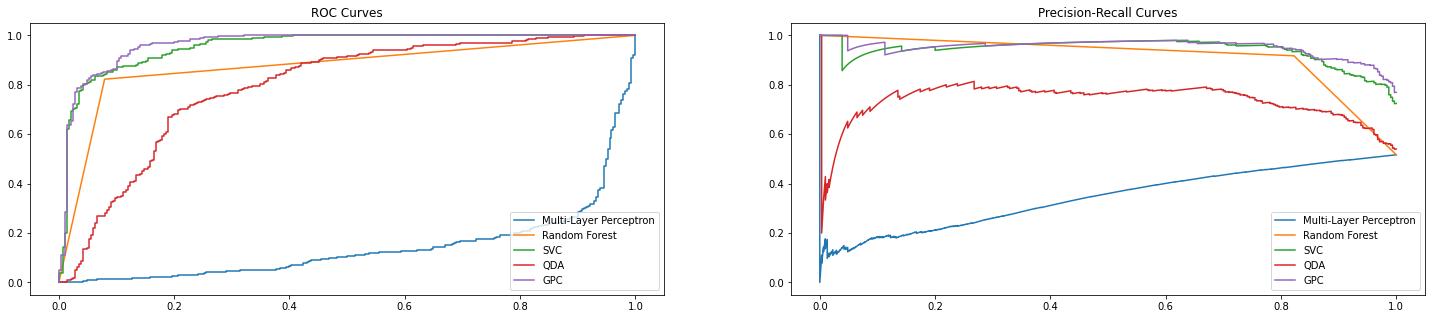

In [33]:
from sklearn.metrics import roc_curve, precision_recall_curve
fig, ax = plt.subplots(1, 2, figsize = (25, 5))

for i in [probaPerceptron, probaRandomForest, probaSVC, probaQuadraticDiscriminantAnalysis, probaGPC]:
    r, o, c = roc_curve(y_test, i)
    ax[0].plot(r, o)

for i in [probaPerceptron, probaRandomForest, probaSVC, probaQuadraticDiscriminantAnalysis, probaGPC]:
    precision, recall, limits = precision_recall_curve(y_test, i)
    ax[1].plot(recall, precision)

ax[0].set_title('ROC Curves')
ax[0].legend(['Multi-Layer Perceptron', 'Random Forest', 'SVC', 'QDA', 'GPC'], loc = 'lower right')
ax[1].set_title('Precision-Recall Curves')
ax[1].legend(['Multi-Layer Perceptron', 'Random Forest', 'SVC', 'QDA', 'GPC'])